<a href="https://colab.research.google.com/github/Saikat-Human/First-Repo/blob/main/aerofit_casestudy_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement:

Leveraging the customer data collected by Aerofit consisting of the Gender, Age, Income, Weekly Usage, Fitness, Marital Status and Miles run on treadmill to identify characteristics which make the customer buy a particular treadmill out of KP281, KP481 and KP781 in the increasing order of expenditures. Further providing recommendations of treadmill for future orders/customers based on their profile.

In [ ]:
## Goal: To do a customer purchase profile.

### Structure for our case study

1. Problem Statement
2. Define the Goal
3. EDA
4. Conclusion: Insights and Recommendation

## Preparing our environment

### Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

### Load the data

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv")

## Basic Exploration

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## High Level Exploration

In [ ]:
# Unique value of each column.

df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
df["Usage"].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [ ]:
df.isnull().sum() ## To check if there is any null values in any of my columns

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
for cols in df.columns:
  print(cols)

Product
Age
Gender
Education
MaritalStatus
Usage
Fitness
Income
Miles


In [ ]:
num_cols = df.select_dtypes(include = ["number"]).columns.tolist()
cat_cols = df.select_dtypes(include = ["object"]).columns.tolist()

In [ ]:
num_cols

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [ ]:
cat_cols

['Product', 'Gender', 'MaritalStatus']

## Checking value counts for categorical columns

In [ ]:
for cols in cat_cols:

  print(df[cols].value_counts())
  print("=====" * 10)

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
Gender
Male      104
Female     76
Name: count, dtype: int64
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


Insights:

1. There are more customers for KP281 than that of KP781
2. There are more Males data than that of female
3. There are more Partnered customers than that of Singles

In [ ]:
df["Education"].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [ ]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [ ]:
## Correalation Analysis

## Correation is done on numerical columns only

In [ ]:
# Creating a copy of the dataframe -
df_copy=df.copy()

df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)

df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


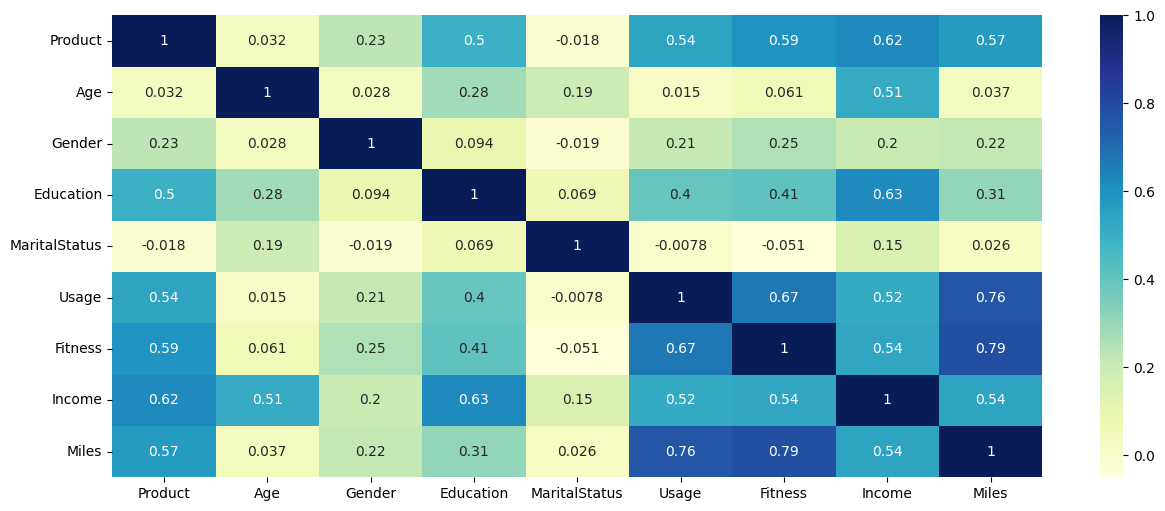

In [ ]:
# Correlation Plot above as a Heatmap -

plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

<Axes: xlabel='Usage', ylabel='Miles'>

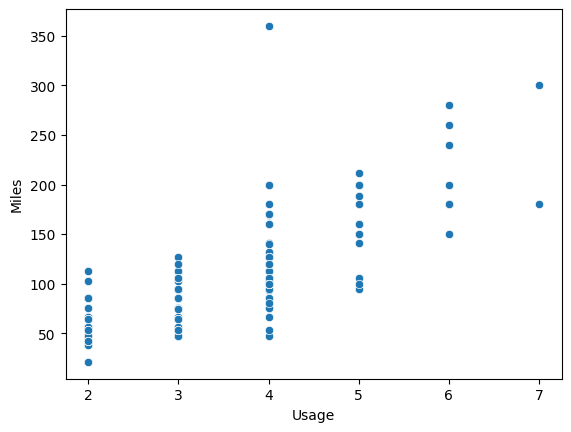

In [ ]:
sns.scatterplot(x = df["Usage"], y = df["Miles"])

#### Observing the Outliers of Age, Income and Miles -

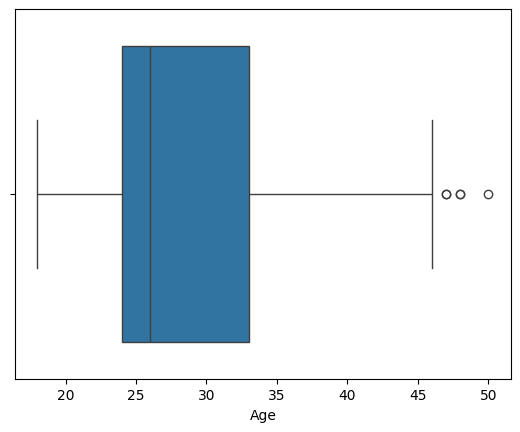

In [ ]:
ax = sns.boxplot(x=df["Age"])
plt.show()

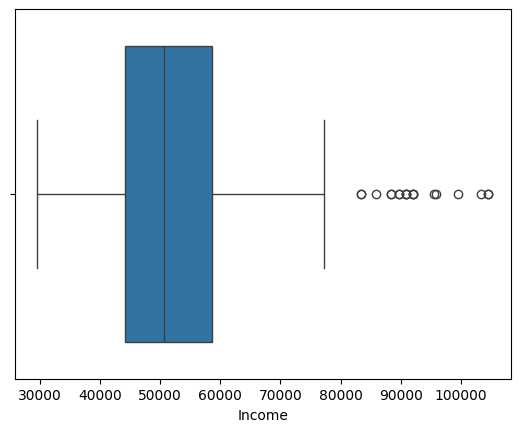

In [ ]:
ax = sns.boxplot(x=df["Income"])
plt.show()

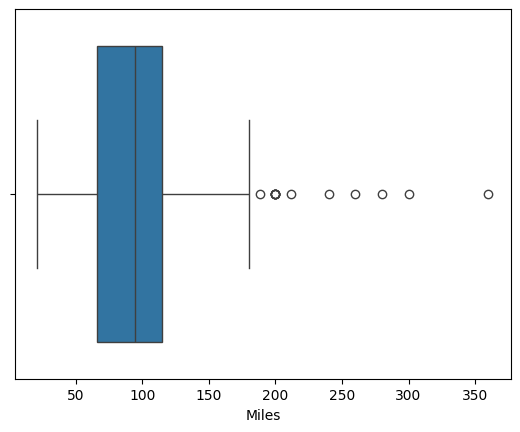

In [ ]:
ax = sns.boxplot(x=df["Miles"])
plt.show()

In [ ]:
df.shape

(180, 9)

Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, it's going to be clipped (i.e. - ranges between 5 percentile and 95 percentile).

P.S. - The outlier treatment is demonstrated in the below piece of code for the copy of dataframe but it is not incorporated in the below analysis since these three numerical columns are binned and then analyzed.

In [ ]:
num_feat=['Age', 'Income', 'Miles']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

In [ ]:
# Create dummy data
data = np.array([3, 7, -2, 15, 0, 9, 20, -5])
print("Original Data:", data)

# Apply np.clip to limit values between 0 and 10
clipped_data = np.clip(data, 0, 10)
print("Clipped Data (0 to 10):", clipped_data)

Original Data: [ 3  7 -2 15  0  9 20 -5]
Clipped Data (0 to 10): [ 3  7  0 10  0  9 10  0]


## Vizulization

In [ ]:
#### Scatterplots for Analysis of Continuous Variables -

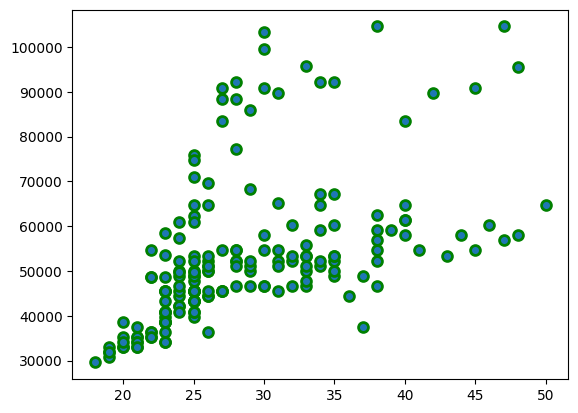

In [ ]:
# Observing the association between Age and Income -

plt.scatter(df['Age'], df['Income'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)

The variance of income in lower ages is smaller as compared to the variance in higher ages, probably something called as Heteroscadasticity.

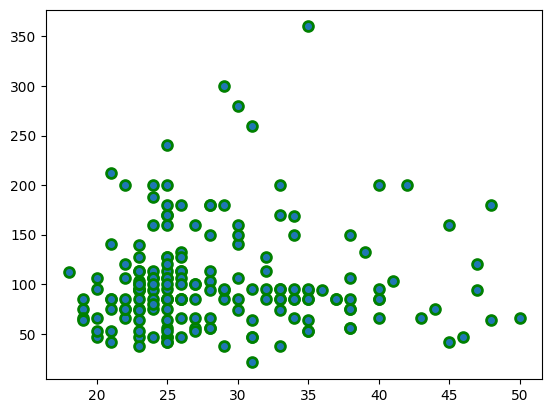

In [ ]:
# Observing the association between Age and Miles -

plt.scatter(df['Age'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)

No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.

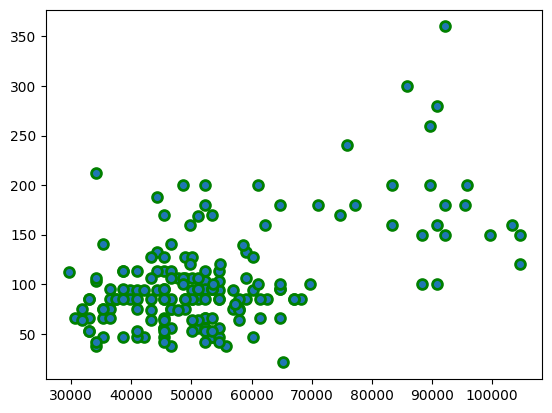

In [ ]:
# Observing the association between Miles and Income -

plt.scatter(df['Income'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="green",
            s = 50)

The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles. Moreover there's also a **Heteroscadastic** effect.

#### Analysis of Categorical Columns with the Product -

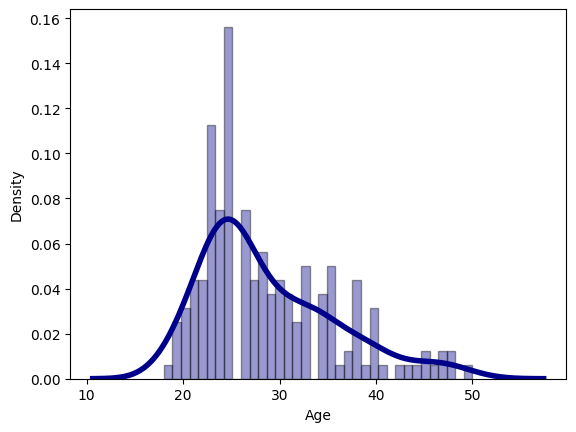

In [ ]:
# Observing the ages to create bins -

sns.distplot(df['Age'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# Creating bins on intervals of 5 as age gaps and below 20, above 40 -

bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20


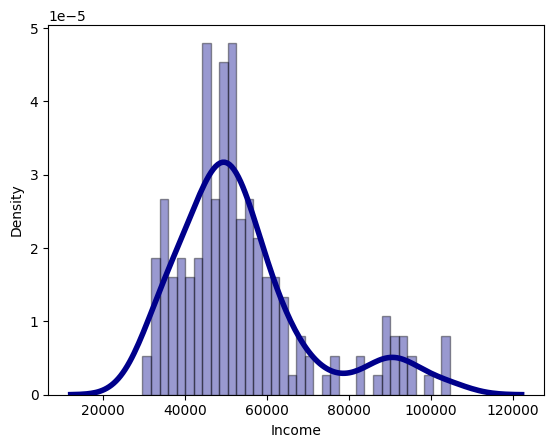

In [ ]:
# Observing the incomes to create bins -

sns.distplot(df['Income'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# Creating bins for income -

bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000


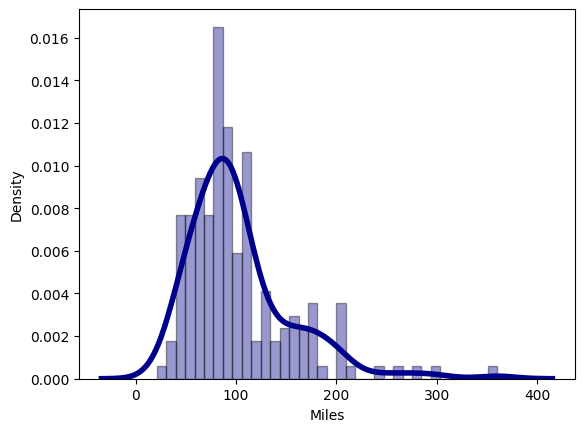

In [ ]:
# Observing the miles to create bins -

sns.distplot(df['Miles'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [ ]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


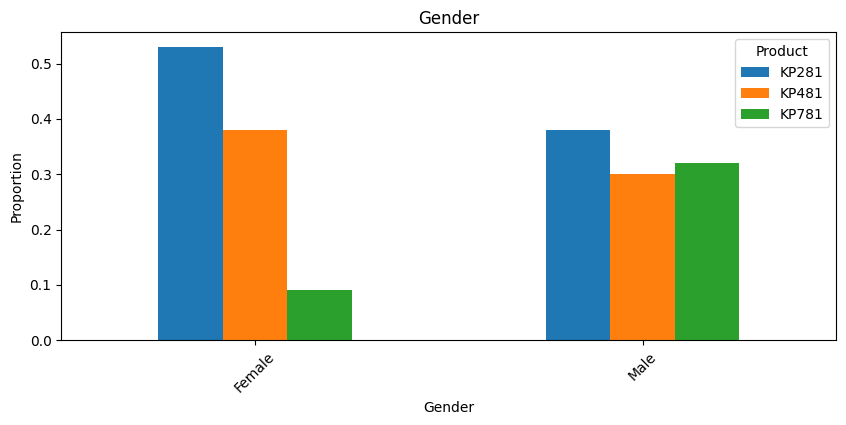

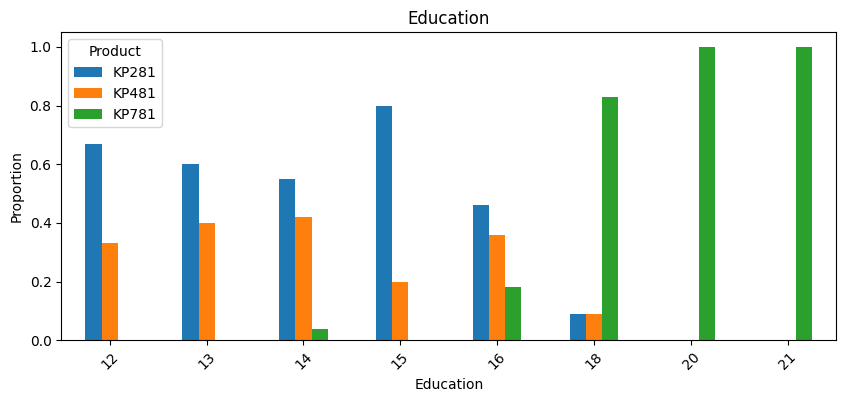

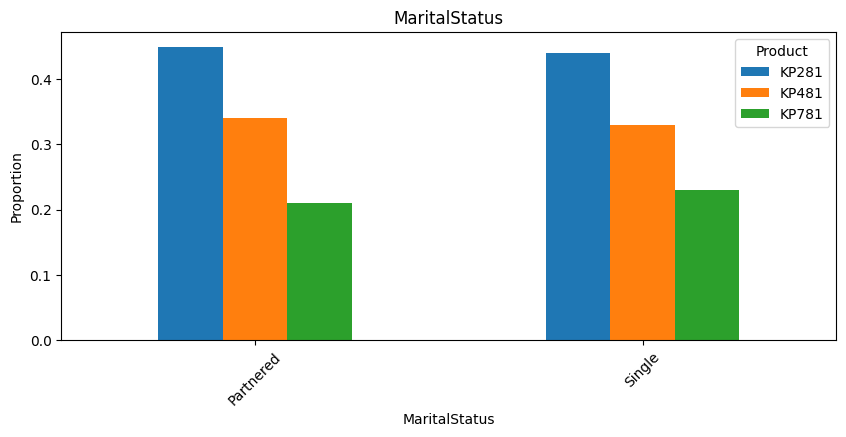

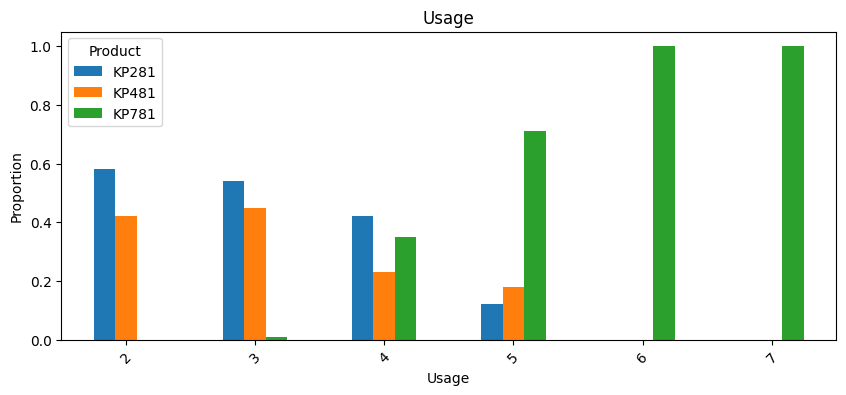

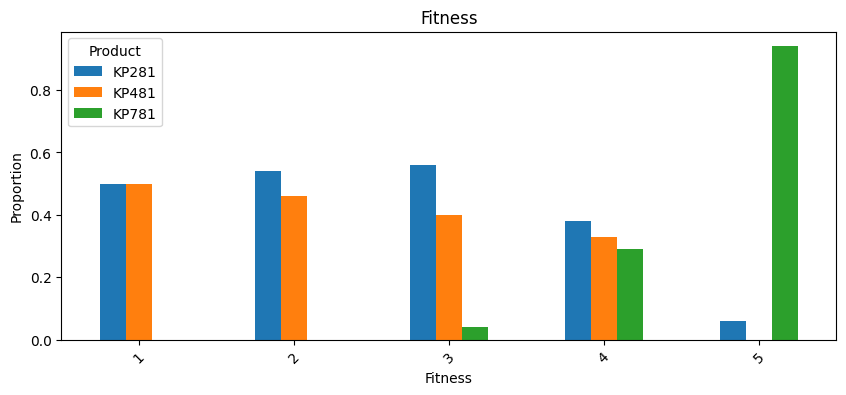

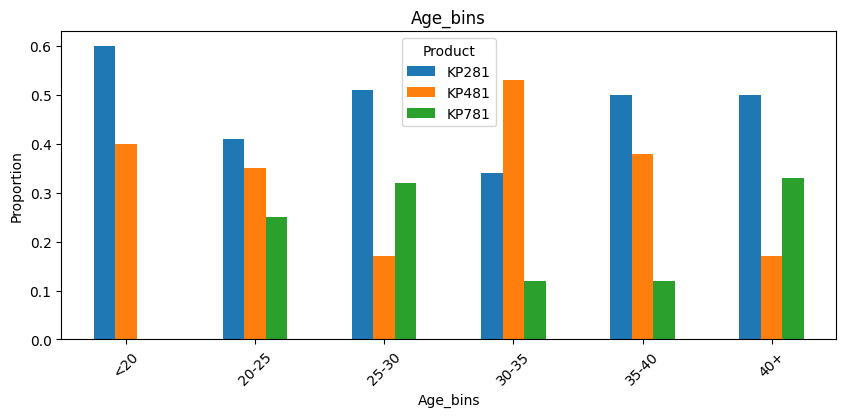

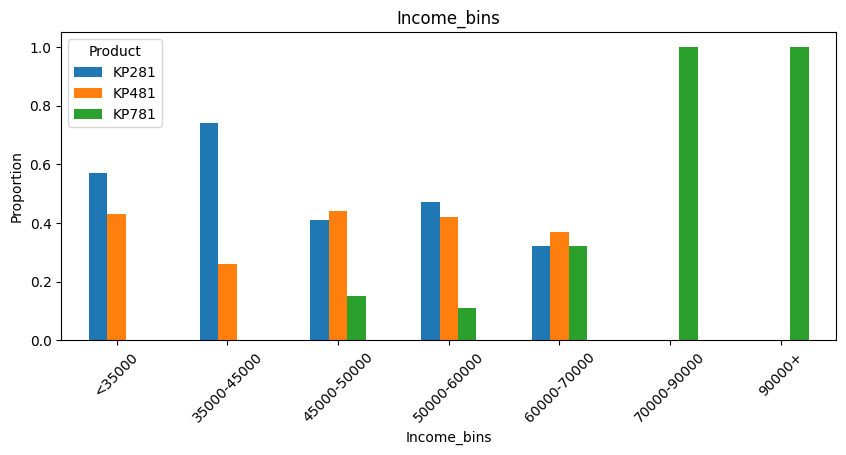

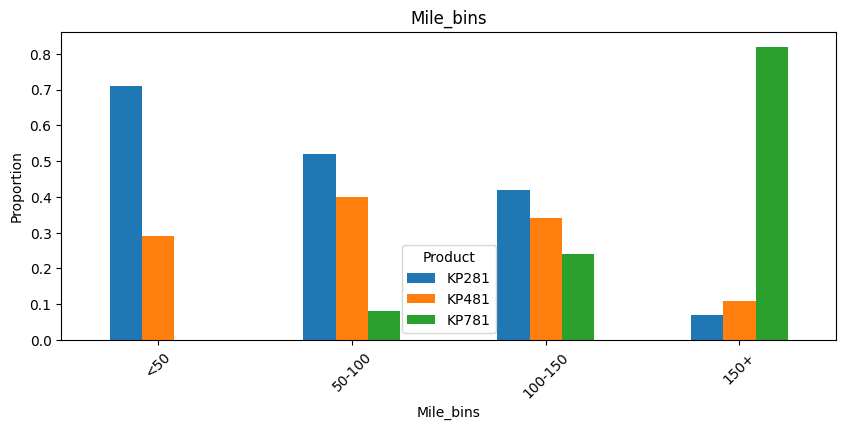

In [ ]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

**Observations on the basis of above Categorical Plots**

1) Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.

2) 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

3) Marital Status implies no significant information on the usages of different treadmills.

4) Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.

5) 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

6) No one below 20 years of age use KP781.

7) Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

8) Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

**Conditional probabilities** - are the probability that an event occurs given that another event has occurred. For example, given that a customer is female, what is the probability she’ll purchase a Mac?

**Marginal Probablities** - Divide the row or column total by the total sample size. Marginal probabilities are the probabilities that a single event occurs with no regard to other events in the table. These probabilities do not depend on the condition of another outcome.

Probability(Mac) ; Probability(Female)

**Normalize**: Default value is False Normalize by dividing all values by the sum of values:

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.

If margins is True, will also normalize margin values.

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'], margins = True, normalize = True) * 100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
# from IPython.display import display

for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222




Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Brief depiction of Probabilities Inferred from the above tables**

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6%
   P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12%

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and  P(KP781|Mile_bins>150)=82.1%

## Recommendation

1. Market KP781 as a premium, performance-focused treadmill.
Use influencer marketing, elite tness programs, and corporate wellness tie-ups.

2. targeting middle income customers with options for low priced products or maybe EMI options/offers

3. Market KP481 as an upgrade treadmill for existing users.
Emphasize features like improved cushioning, pre-set programs, and tracking.
Target mid-levelness enthusiasts,

4. Reduce the price of 481 and increase the price of 281 to close the gap between 2, so that more people could go for 481

5. Market KP281 as a budget-friendly, beginner treadmill. Target marketing to young adults, students, and early professionals.

